In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

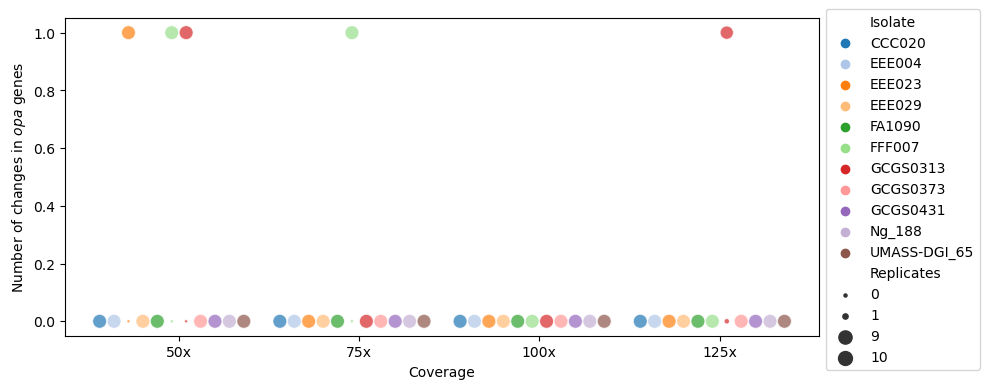

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = {
    "Coverage": ["50x", "75x", "100x", "125x"] * 11,
    "Changes": [0]*44,
    "Replicates":[10]*44,
    "Isolate": (["CCC020"] * 4 +
               ["EEE004"] * 4 +
               ["EEE023"] * 4 +
               ["EEE029"] * 4 +
               ["FA1090"] * 4 +
               ["FFF007"] * 4 +
               ["GCGS0313"] * 4 +
               ["GCGS0373"] * 4 +
               ["GCGS0431"] * 4 + 
               ["Ng_188"] * 4 +
               ["UMASS-DGI_65"] * 4)
}

df = pd.DataFrame(data)
df.loc[(df['Isolate']=='EEE023')&(df['Coverage']=='50x')&(df['Changes']==0), 'Replicates'] = 0
df.loc[(df['Isolate']=='FFF007')&(df['Coverage']=='50x')&(df['Changes']==0), 'Replicates'] = 0
df.loc[(df['Isolate']=='FFF007')&(df['Coverage']=='75x')&(df['Changes']==0), 'Replicates'] = 0
df.loc[(df['Isolate']=='GCGS0313')&(df['Coverage']=='50x')&(df['Changes']==0), 'Replicates'] = 0
df.loc[(df['Isolate']=='GCGS0313')&(df['Coverage']=='125x')&(df['Changes']==0), 'Replicates'] = 1

df = pd.concat([df, pd.DataFrame({'Isolate':['EEE023'], 'Coverage':['50x'], 'Changes':[1], 'Replicates':[10]})])
df = pd.concat([df, pd.DataFrame({'Isolate':['FFF007'], 'Coverage':['50x'], 'Changes':[1], 'Replicates':[10]})])
df = pd.concat([df, pd.DataFrame({'Isolate':['FFF007'], 'Coverage':['75x'], 'Changes':[1], 'Replicates':[10]})])
df = pd.concat([df, pd.DataFrame({'Isolate':['GCGS0313'], 'Coverage':['50x'], 'Changes':[1], 'Replicates':[10]})])
df = pd.concat([df, pd.DataFrame({'Isolate':['GCGS0313'], 'Coverage':['125x'], 'Changes':[1], 'Replicates':[9]})])

# Define fixed isolate order (this controls left→right order)
isolate_order = ["CCC020","EEE004","EEE023","EEE029","FA1090","FFF007","GCGS0313","GCGS0373","GCGS0431","Ng_188","UMASS-DGI_65"]

# Define fixed coverage order
coverage_order = ["50x", "75x", "100x", "125x"]

# Map coverage categories to numeric positions in the desired order
category_mapping = {cat: i for i, cat in enumerate(coverage_order)}
df["x_numeric"] = df["Coverage"].map(category_mapping)

# Add systematic offsets so each isolate lines up in order
offset_strength = 0.08  # controls spacing between isolates
isolate_mapping = {isolate: i for i, isolate in enumerate(isolate_order)}
df["x_jittered"] = df["x_numeric"] + df["Isolate"].map(lambda iso: isolate_mapping[iso] * offset_strength - offset_strength * len(isolate_order) / 2)

# Plot
plt.figure(figsize=(10, 4))
sns.scatterplot(
    data=df,
    x="x_jittered",
    y="Changes",
    hue="Isolate",
    size="Replicates",
    sizes=(5, 100),
    palette="tab20",
    alpha=0.7,
    # hue_order=isolate_order
)

# Fix x-axis ticks and labels
plt.xticks(ticks=list(category_mapping.values()), labels=list(category_mapping.keys()))
plt.xlabel("Coverage")
plt.ylabel("Number of changes in $opa$ genes")
plt.legend(bbox_to_anchor=(1, 1.05), loc="upper left")
plt.tight_layout()
plt.savefig('../../figures/summary_autocycler.png', dpi = 300)
plt.savefig('../../figures/summary_autocycler.pdf')
plt.show()